# Data Cleaning and Preprocessing

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load CSV file
df = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
# Check basic info
# use `info()` to see data types and missing values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Print upper 10 rows of dataset.
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    1 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312  0.432793   
4                           Allen, Mr. William Henry    0  0.433312 -0.474545   
5                                   Moran, Mr. James    0 -0.104637 -0.474545   
6                            McCarth

In [ ]:
# Check how many null values present in dataset in columns.
# check missing values using `isnull().sum()`.
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Find the values
#  Use `describe()` for quick statistics.
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#Handle Missing Values

In [ ]:
# Drop Cabin column (To missing many values)
df = df.drop('Cabin', axis=1)

In [ ]:
# Fill Age and Fare with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

In [ ]:
# Fill Embarked with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Check again for remaining missing values
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Encode Categorical Variables/ Features.

In [ ]:
# Convert “Sex” and “Embarked” to numbers.
# Encode 'Sex' (Label encoding: male=0, female=1)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
# Remove outliers using percentile method
for col in ['Age', 'Fare']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(df.shape)


(867, 12)


# Normalize/Standardize Numerical Features

In [ ]:
# Numerical columns: Age, Fare, SibSp, Parch
from sklearn.preprocessing import StandardScaler

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age     SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861  0.432793   
2                             Heikkinen, Miss. Laina    1 -0.258337 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312  0.432793   
4                           Allen, Mr. William Henry    0  0.433312 -0.474545   

      Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0 -0.473674         A/5 21171 -0.502445       False        True  
1 -0.473674          PC 17599  0.786845       False       False  
2 -0.473674  STON/O2. 3101282 -0.488854       False        True  
3 -0.473674            113803  0

In [ ]:
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Standardization sets mean to 0 and stdev to 1, making features comparable in scale.
print(df.head())

#Visualize & Remove Outliers


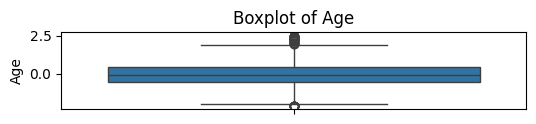

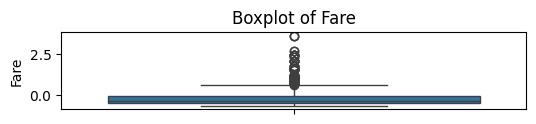

In [22]:
# We use boxplots to check for outliers, then remove extreme ones using percentiles.
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,1))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Remove outliers using percentile method
for col in ['Age', 'Fare']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print(df.shape)

(846, 12)


#Save Cleaned Data

In [ ]:
df.to_csv('Titanic_Cleaned.csv', index=False)